## Artificial Neural Networks (ANN)

We will start by looking at applying neural networks to some artificially created data. This will help get a feel for what parameters can be tuned when training a neural network. 

### Data

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [2]:
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
import random
random.seed(123)

In [4]:
# Read the datasets
#train = pd.read_csv("data/intro_to_ann.csv")

# Run the following if running with Colab
train = pd.read_csv("https://github.com/fordanic/cmiv-ai-course/raw/master/notebooks/data/intro_to_ann.csv")

In [5]:
X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

The data is two-dimensional so we can plot it. The color of the dot indicates the class, the features are the x- and y-coordinate of the dot.

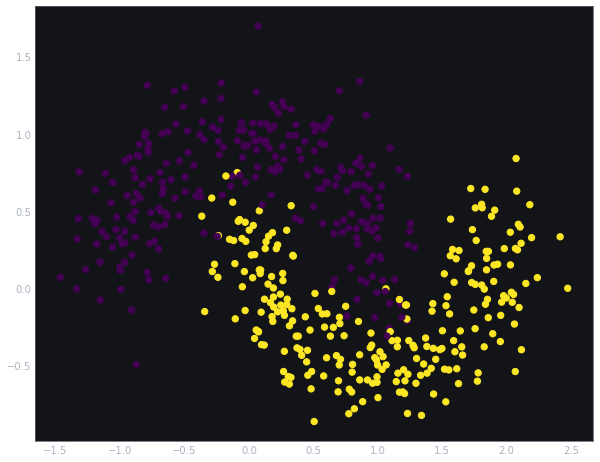

In [7]:
plt.scatter(X[:,0], X[:,1], s=40, c=y)
plt.grid(False)

*The code below is just for support you do not need to understand it*

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

def get_device():
    device_string = '/cpu:0'
    gpu=None # Set to None to avoid using the GPU
    if gpu is not None:
        device_string='/device:GPU:{0}'.format(gpu)
    return tf.device(device_string)

def crossentropy_logits(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred, from_logits=True)

# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y)

### Train a model

To train the model we need to:
- Create the model
- Decide on a loss function
- Iteratively optimize the loss with respect to the model parameters
- (Visualize the training and result)

In [32]:
def run_experiment(model, optimizer, epochs):
    with get_device():
        # Compile the model, giving it our custom loss-function
        model.compile(optimizer=optimizer, 
                    loss=crossentropy_logits, 
                    metrics=['accuracy'])    
        # Fit the model and save the logs
        logs = model.fit(X, to_categorical(y, num_classes=2), 
                        validation_split=0.1, 
                        epochs=epochs, 
                        verbose=0)
    # Plot the accuracy on the training data and the validation data
    plt.plot(logs.history['loss'], c='r', label='Train')
    plt.plot(logs.history['val_loss'], c='g', label='Validation')
    plt.legend()
    plt.show()
    plot_decision_boundary(model)


Here we define the input to output relationship that is our neural network.

We need to decide:
- Input/output data dimensions
- Number of hidden layers
- Number of neurons in each layer
- Activation function

In [33]:
# Build a model from a set of layers
def build_mlp_model(layers):
    input = Input(shape=(2,))    
    x = input
    for layer in layers:
        x = layer(x)
    x = Dense(2)(x)
    return Model(input, x)

### Experiment

We can experiment with a number of parameters for our learning problem:

Archiutecture:
- Change the number of hidden nodes `Dense(50,activation='sigmoid')`
- Change the activation `Dense(10,activation='relu')`
- Change the number of layers `[Dense(10,activation='relu'), Dense(10,activation='relu')]`
- Add normalization `[Dense(10,activation='relu'), Dropout(0.1), Dense(10,activation='relu')]`

Optimizer:
- We can try another optimizer `optimizer = Adam(learning_rate=0.01)`

Time:
- We can increase the number of steps the optimizer takes (how far we run) `epochs=50`


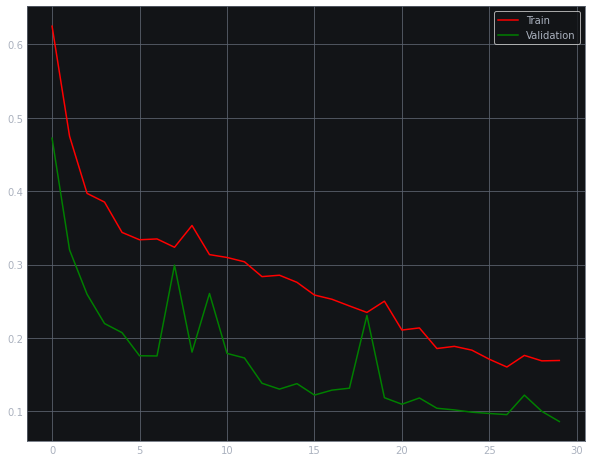

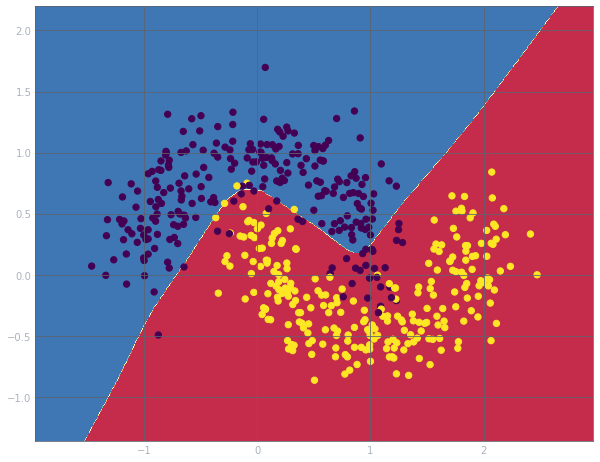

In [37]:
model = build_mlp_model([Dense(10, activation='sigmoid')]) 
#model = build_mlp_model([Dense(50, activation='relu'), Dropout(0.1), Dense(50, activation='relu'), Dropout(0.1)])
optimizer = SGD(learning_rate=0.1)
# optimizer = Adam(learning_rate=0.01)
epochs = 30
# epochs = 50
run_experiment(model, optimizer, epochs)